In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
import seaborn as sns

import keras
from keras import metrics
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.models import model_from_json
from keras.callbacks import EarlyStopping

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score

Using TensorFlow backend.


In [2]:
from tf_unet import image_util
from tf_unet import unet
from tf_unet import util

In [ ]:
output_path = "./trained_shallowNN_k8_epoch1000_data_trainset_20190717"
prediction_path = "./prediction_shallowNN_k8_epoch1000_data_trainset_20190717"

In [3]:
# prepare data

k = 8# choose convolutional filter size

training_data = image_util.ImageDataProvider("./data_trainset_20190717/*.tif")
i=26 #number of images
x_train, y_train = training_data(i)  #max=1, min=0
print(x_train.shape)
print(y_train.shape)

valid_data = image_util.ImageDataProvider("./data_tuneset_20190717/*.tif")
i=6 #number of images
x_valid, y_valid = valid_data(i)

test_data = image_util.ImageDataProvider("./data_testset_random_20190812/*.tif")
i=6 #number of images
x_test, y_test = test_data(i)

train_x = x_train
valid_x = x_valid
test_x = x_test

#make output the same as imput (test model's ability to learn identity function)
#y_train = x_train
#y_valid = x_valid
#y_test = x_test
#train_y = y_train[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,0]
#valid_y = y_valid[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,0]
#test_y = y_test[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,0]

#crop label shape to match model output
train_y = y_train[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,1]
valid_y = y_valid[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,1]
test_y = y_test[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,1]

#fix dimension
train_y= np.stack([train_y], axis = 3)
valid_y= np.stack([valid_y], axis = 3)
test_y= np.stack([test_y], axis = 3)

print(train_x.shape)
print(train_y.shape)
print(max(train_x.flatten()))
print(min(train_x.flatten()))
print(max(train_y.flatten()))
print(min(train_y.flatten()))

Number of files used: 26
Number of channels: 1
Number of classes: 2
(26, 1000, 1000, 1)
(26, 1000, 1000, 2)
Number of files used: 6
Number of channels: 1
Number of classes: 2
Number of files used: 6
Number of channels: 1
Number of classes: 2
(26, 1000, 1000, 1)
(26, 993, 993, 1)
1.0
0.0
1.0
0.0


In [4]:
batch_size = 1
epochs = 1000

model = Sequential()
model.add(Conv2D(1, kernel_size = (k,k), data_format = 'channels_last',
                     input_shape = (1000,1000,1), kernel_initializer = 'random_uniform'))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)#,
#                    validation_data=(valid_x, valid_y))


Instructions for updating:
Colocations handled automatically by placer.


2020-04-11 02:20:06,982 From /home/yao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 993, 993, 1)       65        
_________________________________________________________________
activation_1 (Activation)    (None, 993, 993, 1)       0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


2020-04-11 02:20:07,052 From /home/yao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/1000
26/26 [==============================] - 9s 342ms/step - loss: 0.6495 - acc: 0.9817
Epoch 2/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.5765 - acc: 0.9935
Epoch 3/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.5218 - acc: 0.9935
Epoch 4/1000
26/26 [==============================] - 9s 349ms/step - loss: 0.4782 - acc: 0.9935
Epoch 5/1000
26/26 [==============================] - 9s 351ms/step - loss: 0.4422 - acc: 0.9935
Epoch 6/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.4116 - acc: 0.9935
Epoch 7/1000
26/26 [==============================] - 9s 330ms/step - loss: 0.3852 - acc: 0.9935
Epoch 8/1000
26/26 [==============================] - 9s 329ms/step - loss: 0.3621 - acc: 0.9935
Epoch 9/1000
26/26 [==============================] - 9s 330ms/step - loss: 0.3416 - acc: 0.9935
Epoch 10/1000
26/26 [==============================] - 9s 329ms/step - loss: 0.3234 - acc: 0.9935
Epoch 11/1000
26/26 [========

26/26 [==============================] - 9s 335ms/step - loss: 0.0784 - acc: 0.9935
Epoch 85/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0778 - acc: 0.9935
Epoch 86/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0772 - acc: 0.9935
Epoch 87/1000
26/26 [==============================] - 9s 338ms/step - loss: 0.0766 - acc: 0.9935
Epoch 88/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0761 - acc: 0.9935
Epoch 89/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0755 - acc: 0.9935
Epoch 90/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0750 - acc: 0.9935
Epoch 91/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0745 - acc: 0.9935
Epoch 92/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0739 - acc: 0.9935
Epoch 93/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0734 - acc: 0.9935
Epoch 94/1000
26/26 [=============

26/26 [==============================] - 9s 335ms/step - loss: 0.0519 - acc: 0.9935
Epoch 168/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0517 - acc: 0.9935
Epoch 169/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0516 - acc: 0.9935
Epoch 170/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0514 - acc: 0.9935
Epoch 171/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0512 - acc: 0.9935
Epoch 172/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0511 - acc: 0.9935
Epoch 173/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0509 - acc: 0.9935
Epoch 174/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0508 - acc: 0.9935
Epoch 175/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0506 - acc: 0.9935
Epoch 176/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0505 - acc: 0.9935
Epoch 177/1000
26/26 [===

26/26 [==============================] - 9s 337ms/step - loss: 0.0426 - acc: 0.9935
Epoch 250/1000
26/26 [==============================] - 9s 338ms/step - loss: 0.0426 - acc: 0.9935
Epoch 251/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0425 - acc: 0.9935
Epoch 252/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0424 - acc: 0.9935
Epoch 253/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0423 - acc: 0.9935
Epoch 254/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0423 - acc: 0.9935
Epoch 255/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0422 - acc: 0.9935
Epoch 256/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0421 - acc: 0.9935
Epoch 257/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0420 - acc: 0.9935
Epoch 258/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0420 - acc: 0.9935
Epoch 259/1000
26/26 [===

26/26 [==============================] - 9s 336ms/step - loss: 0.0378 - acc: 0.9935
Epoch 332/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0378 - acc: 0.9935
Epoch 333/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0378 - acc: 0.9935
Epoch 334/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0377 - acc: 0.9935
Epoch 335/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0377 - acc: 0.9935
Epoch 336/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0376 - acc: 0.9935
Epoch 337/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0376 - acc: 0.9935
Epoch 338/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0375 - acc: 0.9935
Epoch 339/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0375 - acc: 0.9935
Epoch 340/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0374 - acc: 0.9935
Epoch 341/1000
26/26 [===

26/26 [==============================] - 9s 334ms/step - loss: 0.0349 - acc: 0.9935
Epoch 414/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0348 - acc: 0.9935
Epoch 415/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0348 - acc: 0.9935
Epoch 416/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0348 - acc: 0.9935
Epoch 417/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0347 - acc: 0.9935
Epoch 418/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0347 - acc: 0.9935
Epoch 419/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0347 - acc: 0.9935
Epoch 420/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0346 - acc: 0.9935
Epoch 421/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0346 - acc: 0.9935
Epoch 422/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0346 - acc: 0.9935
Epoch 423/1000
26/26 [===

26/26 [==============================] - 9s 337ms/step - loss: 0.0328 - acc: 0.9935
Epoch 496/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0328 - acc: 0.9935
Epoch 497/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0327 - acc: 0.9935
Epoch 498/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0327 - acc: 0.9935
Epoch 499/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0327 - acc: 0.9935
Epoch 500/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0327 - acc: 0.9935
Epoch 501/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0326 - acc: 0.9935
Epoch 502/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0326 - acc: 0.9935
Epoch 503/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0326 - acc: 0.9935
Epoch 504/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0326 - acc: 0.9935
Epoch 505/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0312 - acc: 0.9935
Epoch 578/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0312 - acc: 0.9935
Epoch 579/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0312 - acc: 0.9935
Epoch 580/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0312 - acc: 0.9935
Epoch 581/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0312 - acc: 0.9935
Epoch 582/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0311 - acc: 0.9935
Epoch 583/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0311 - acc: 0.9935
Epoch 584/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0311 - acc: 0.9935
Epoch 585/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0311 - acc: 0.9935
Epoch 586/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0311 - acc: 0.9935
Epoch 587/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0300 - acc: 0.9935
Epoch 660/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0300 - acc: 0.9935
Epoch 661/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0300 - acc: 0.9935
Epoch 662/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0300 - acc: 0.9935
Epoch 663/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0300 - acc: 0.9935
Epoch 664/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0299 - acc: 0.9935
Epoch 665/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0299 - acc: 0.9935
Epoch 666/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0299 - acc: 0.9935
Epoch 667/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0299 - acc: 0.9935
Epoch 668/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0299 - acc: 0.9935
Epoch 669/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 742/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 743/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 744/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 745/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 746/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0290 - acc: 0.9935
Epoch 747/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0290 - acc: 0.9935
Epoch 748/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0289 - acc: 0.9935
Epoch 749/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0289 - acc: 0.9935
Epoch 750/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0289 - acc: 0.9935
Epoch 751/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0282 - acc: 0.9935
Epoch 824/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0282 - acc: 0.9935
Epoch 825/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0282 - acc: 0.9935
Epoch 826/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0282 - acc: 0.9935
Epoch 827/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0282 - acc: 0.9935
Epoch 828/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0281 - acc: 0.9935
Epoch 829/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0281 - acc: 0.9935
Epoch 830/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0281 - acc: 0.9935
Epoch 831/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0281 - acc: 0.9935
Epoch 832/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0281 - acc: 0.9935
Epoch 833/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0275 - acc: 0.9935
Epoch 906/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0275 - acc: 0.9935
Epoch 907/1000
26/26 [==============================] - 9s 336ms/step - loss: 0.0275 - acc: 0.9935
Epoch 908/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0275 - acc: 0.9935
Epoch 909/1000
26/26 [==============================] - 9s 337ms/step - loss: 0.0275 - acc: 0.9935
Epoch 910/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0274 - acc: 0.9935
Epoch 911/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0274 - acc: 0.9935
Epoch 912/1000
26/26 [==============================] - 9s 335ms/step - loss: 0.0274 - acc: 0.9935
Epoch 913/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0274 - acc: 0.9935
Epoch 914/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0274 - acc: 0.9935
Epoch 915/1000
26/26 [===

26/26 [==============================] - 9s 332ms/step - loss: 0.0269 - acc: 0.9935
Epoch 988/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0269 - acc: 0.9935
Epoch 989/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0269 - acc: 0.9935
Epoch 990/1000
26/26 [==============================] - 9s 334ms/step - loss: 0.0269 - acc: 0.9935
Epoch 991/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0268 - acc: 0.9935
Epoch 992/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0268 - acc: 0.9935
Epoch 993/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0268 - acc: 0.9935
Epoch 994/1000
26/26 [==============================] - 9s 333ms/step - loss: 0.0268 - acc: 0.9935
Epoch 995/1000
26/26 [==============================] - 9s 332ms/step - loss: 0.0268 - acc: 0.9935
Epoch 996/1000
26/26 [==============================] - 9s 331ms/step - loss: 0.0268 - acc: 0.9935
Epoch 997/1000
26/26 [===

Text(0.5, 1.0, 'Training and validation loss')

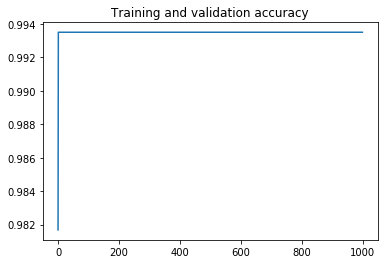

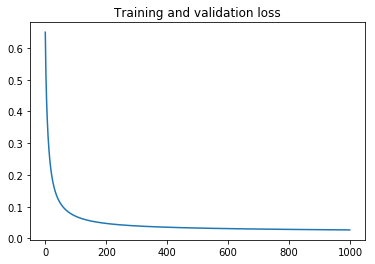

In [5]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
#val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.plot(range(len(acc)), acc)
#plt.plot(range(len(acc)), val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(len(loss)), loss)
#plt.plot(range(len(loss)), val_loss)
plt.title('Training and validation loss')

In [6]:
# prediction
prediction = model.predict(test_x)
prediction = np.array(prediction)

test_y_ = test_y.flatten()
test_y_predict = prediction.flatten()
print(max(test_y_predict))
print(min(test_y_predict))
print(max(test_y_))
print(min(test_y_))


0.48895812
0.00047141314
1.0
0.0


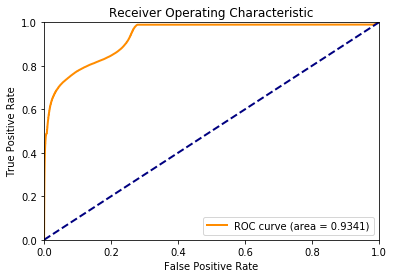

AUC =  0.9341442615818237


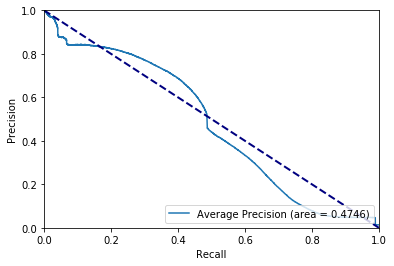

AP =  0.47456338346826865


In [7]:
fpr, tpr, thresholds = roc_curve(test_y_,test_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print('AUC = ',roc_auc)

precision, recall, thresholds = precision_recall_curve(test_y_, test_y_predict)
AP = average_precision_score(test_y_, test_y_predict)
plt.figure()
plt.plot(recall, precision, label = 'Average Precision (area = %0.4f)' % AP)
plt.plot([0, 1], [1, 0], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower right')
plt.show()
print('AP = ',AP)

In [9]:
# save performance
import scipy.io as sio
dict={
    "fprate":fpr, 
    "tprate":tpr,
    "recall":recall, 
    "precision":precision
}

sio.savemat('performance'+prediction_path[12:]+'.mat', dict)

In [31]:
# SAVE MODEL
import os

# detect the current working directory and print it
os.mkdir(output_path)
os.chdir(output_path)

# serialize model to JSON
model_json = model.to_json()
with open(output_path + "model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(output_path + "model.h5")
print("Saved model to disk")

os.chdir('/home/yao/Downloads/tf_unet-master/demo') # back to demo directory

Saved model to disk


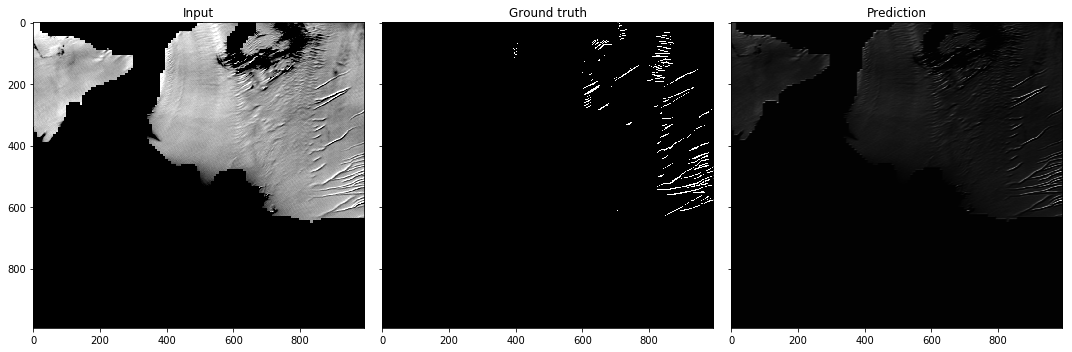

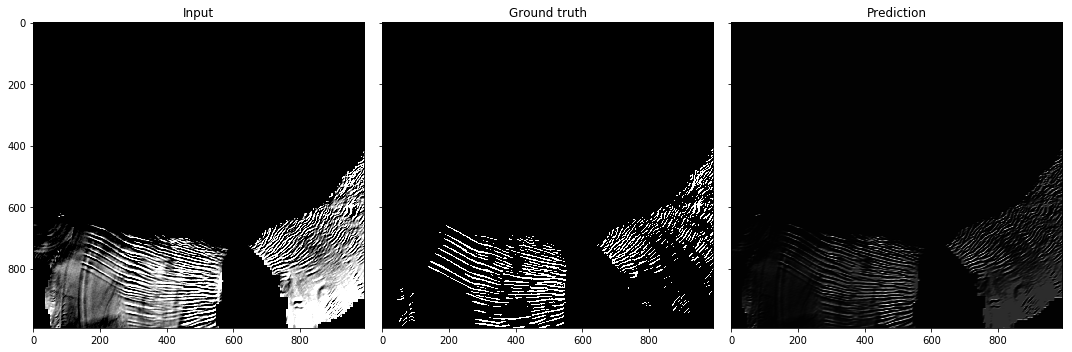

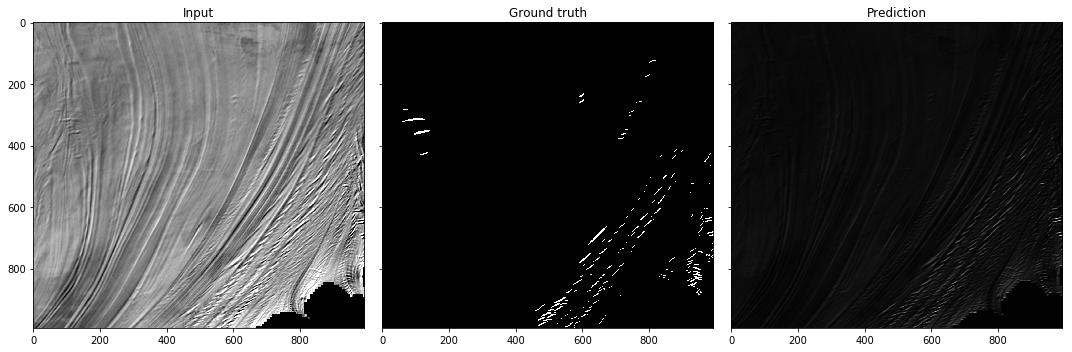

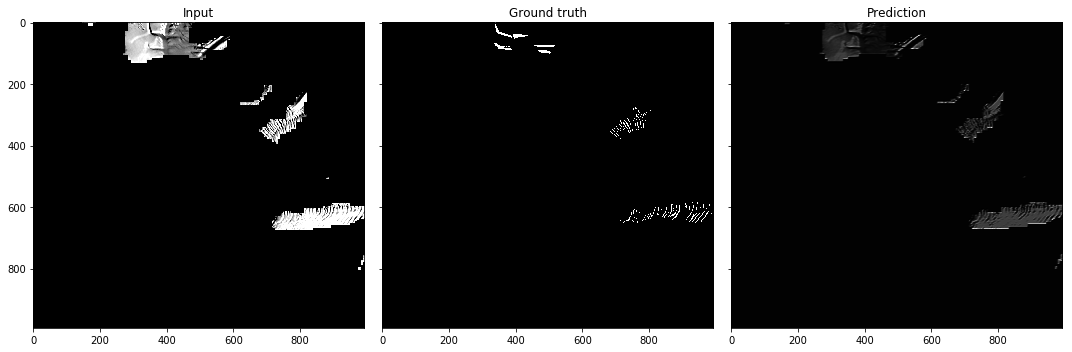

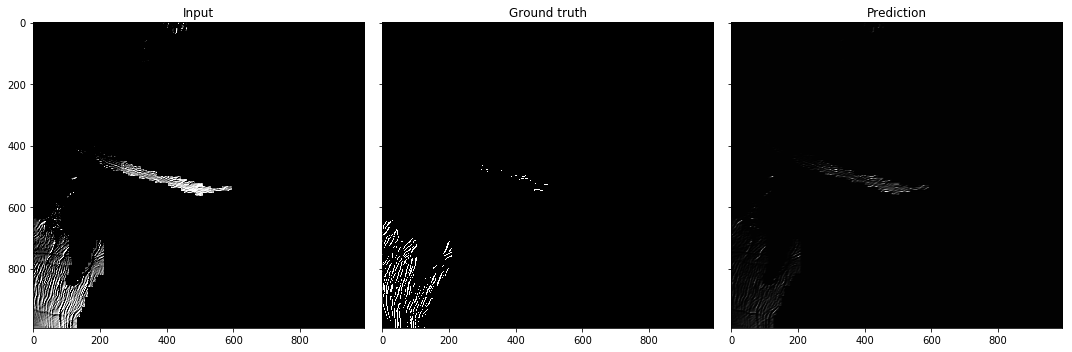

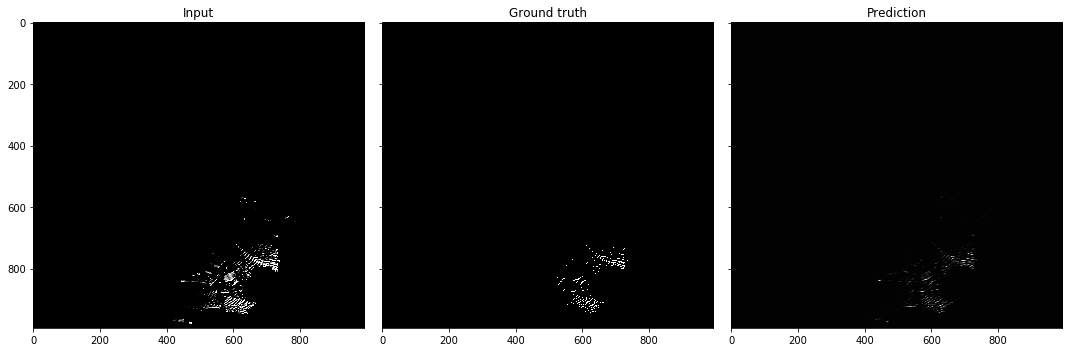

In [10]:
# display
for i in range(0,6):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
    ax[0].imshow(test_x[i,...,0], aspect="auto")
    ax[1].imshow(test_y[i,...,0], aspect="auto")
    ax[2].imshow(prediction[i,...,0], aspect="auto")
    ax[0].set_title("Input")
    ax[1].set_title("Ground truth")
    ax[2].set_title("Prediction")
    fig.tight_layout()

## test on Roos ice shelf

In [11]:
#prepare test data
test_data = image_util.ImageDataProvider("./data_ross/*.tif")
i=2 #number of images
x_test, y_test = test_data(i)
print(x_test.shape)
print(y_test.shape)
test_x = x_test
test_y = y_test[...,int(k/2):1000-int(k/2)+1,int(k/2):1000-int(k/2)+1,1]
test_y= np.stack([test_y], axis = 3)

prediction = model.predict(test_x)
prediction = np.array(prediction)

test_y_ = test_y.flatten()
test_y_predict = prediction.flatten()

Number of files used: 2
Number of channels: 1
Number of classes: 2
(2, 1000, 1000, 1)
(2, 1000, 1000, 2)


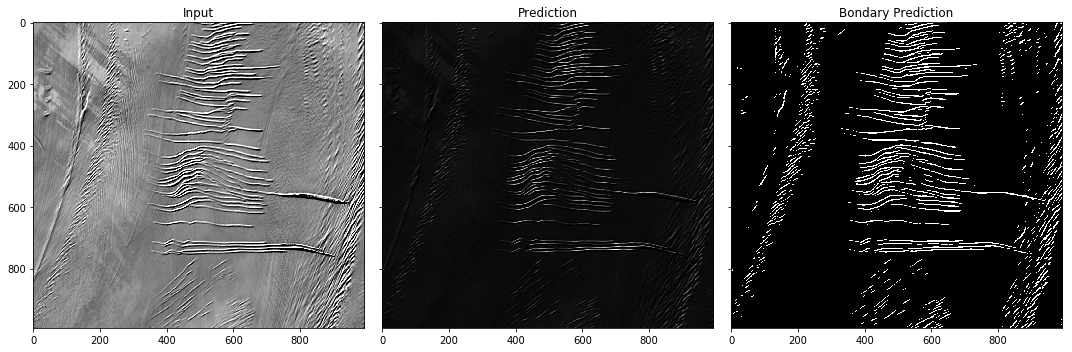

In [13]:
# display
i=0#sample index
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(prediction[i,...,0], aspect="auto")
mask = prediction[i,...,0] > 0.05
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
ax[2].set_title("Bondary Prediction")
fig.tight_layout()